<a href="https://colab.research.google.com/github/radeonaru/pcvk_ganjil_2024/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Muhammad Bagus Indrawan**

**Kelas : TI-3A/20**

**NIM : 2241720217**

# MODUL 9 – Morfologi

### D. TUGAS PRAKTIKUM

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.
Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.  


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)

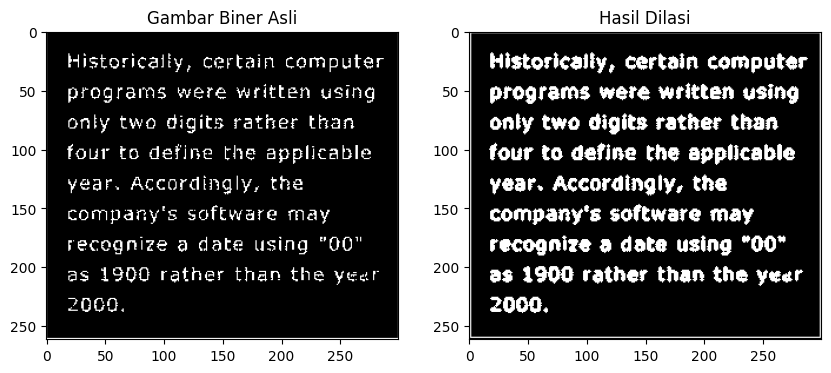

In [9]:
# Fungsi untuk melakukan dilasi
def dilate(image, struct_elem):
    # Dapatkan ukuran gambar
    rows, cols = image.shape
    # Dapatkan ukuran dari structuring element
    s_rows, s_cols = struct_elem.shape

    # Menentukan padding
    pad_r = s_rows // 2
    pad_c = s_cols // 2

    # Buat gambar hasil dilasi yang diinisialisasi dengan nilai 0
    dilated_image = np.zeros_like(image)

    # Iterasi melalui setiap piksel gambar
    for i in range(pad_r, rows - pad_r):
        for j in range(pad_c, cols - pad_c):
            # Ekstrak area gambar yang berhubungan dengan structuring element
            region = image[i - pad_r:i + pad_r + 1, j - pad_c:j + pad_c + 1]
            # Jika ada piksel foreground (1) dalam area yang tumpang tindih dengan SE, setel piksel pusat menjadi 1
            if np.any(region[struct_elem == 1]):
                dilated_image[i, j] = 255

    return dilated_image

# Load gambar
image = cv2.imread('drive/MyDrive/PCVK/morphology.png', cv2.IMREAD_GRAYSCALE)

# Thresholding gambar untuk binerisasi
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Structuring Element
structuring_element = np.array([[0, 1, 0],
                                [1, 1, 1],
                                [0, 1, 0]], dtype=np.uint8)

# Panggil fungsi dilasi
dilated_image = dilate(binary_image, structuring_element)

# Tampilkan hasil gambar asli dan dilasi
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()


4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


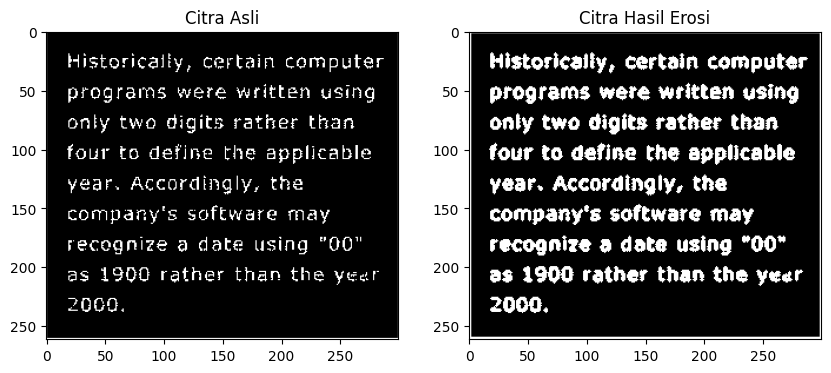

In [13]:
# Load gambar
image = cv2.imread('drive/MyDrive/PCVK/morphology.png', cv2.IMREAD_GRAYSCALE)

# Thresholding gambar untuk binerisasi
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat Structuring Element Dilasi berbentuk cross 3x3
structuring_element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Cetak Structuring Element-nya
print(structuring_element)

# Lakukan operasi dilasi pada gambar
dilated_image = cv2.dilate(binary_image, structuring_element)

# Tampilkan hasil gambar asli dan gambar hasil dilasi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Erosi')

plt.show()


5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

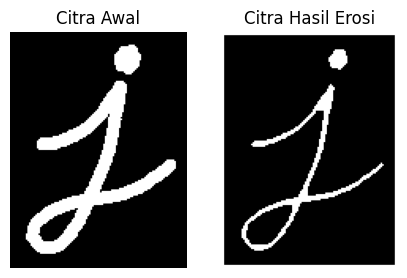

In [17]:
# Fungsi untuk melakukan erosi
def erode(image, struct_elem):
    # Dapatkan ukuran gambar
    rows, cols = image.shape
    # Dapatkan ukuran dari structuring element
    s_rows, s_cols = struct_elem.shape

    # Tentukan padding
    pad_r = s_rows // 2
    pad_c = s_cols // 2

    # Buat gambar hasil erosi yang diinisialisasi dengan nilai 255
    eroded_image = np.ones_like(image) * 255

    # Iterasi melalui setiap piksel gambar
    for i in range(pad_r, rows - pad_r):
        for j in range(pad_c, cols - pad_c):
            # Ekstrak area gambar yang berhubungan dengan structuring element
            region = image[i - pad_r:i + pad_r + 1, j - pad_c:j + pad_c + 1]
            # Jika semua piksel foreground (255) dalam area yang tumpang tindih dengan SE, setel piksel pusat menjadi foreground
            if np.all(region[struct_elem == 1] == 255):
                eroded_image[i, j] = 255  # tetap foreground
            else:
                eroded_image[i, j] = 0  # setel ke background

    return eroded_image

# Load gambar
image = cv2.imread('drive/MyDrive/PCVK/j.png', cv2.IMREAD_GRAYSCALE)

# Thresholding gambar untuk binerisasi
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Structuring Element
structuring_element = np.ones((5, 5), dtype=np.uint8)

# Panggil fungsi erosi
eroded_image = erode(binary_image, structuring_element)

# Tampilkan hasil gambar asli dan erosi
plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()


6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


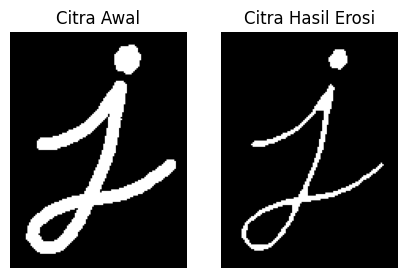

In [20]:
# Load gambar
image = cv2.imread('drive/MyDrive/PCVK/j.png', cv2.IMREAD_GRAYSCALE)

# Thresholding gambar untuk binerisasi
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat Structuring Element berbentuk square 5x5
structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Cetak Structuring Element-nya
print(structuring_element)

# Lakukan operasi erosi pada gambar
eroded_image = cv2.erode(binary_image, structuring_element)

# Tampilkan hasil gambar asli dan hasil erosi
plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')

plt.show()


7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

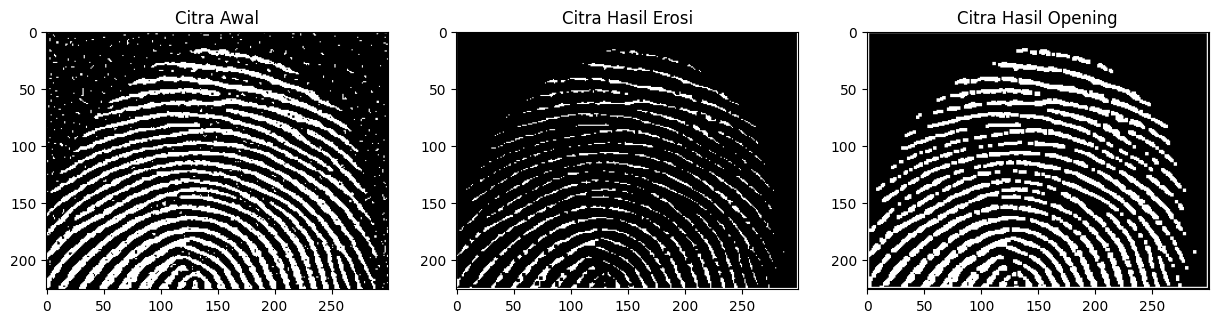

In [28]:
# Operasi tanpa menggunakan library

# Fungsi untuk melakukan erosi
def erode(image, struct_elem):
    rows, cols = image.shape
    s_rows, s_cols = struct_elem.shape
    pad_r = s_rows // 2
    pad_c = s_cols // 2
    eroded_image = np.ones_like(image) * 255

    for i in range(pad_r, rows - pad_r):
        for j in range(pad_c, cols - pad_c):
            region = image[i - pad_r:i + pad_r + 1, j - pad_c:j + pad_c + 1]
            if np.all(region[struct_elem == 1] == 255):
                eroded_image[i, j] = 255
            else:
                eroded_image[i, j] = 0

    return eroded_image

# Fungsi untuk melakukan dilasi
def dilate(image, struct_elem):
    rows, cols = image.shape
    s_rows, s_cols = struct_elem.shape
    pad_r = s_rows // 2
    pad_c = s_cols // 2
    dilated_image = np.zeros_like(image)

    for i in range(pad_r, rows - pad_r):
        for j in range(pad_c, cols - pad_c):
            region = image[i - pad_r:i + pad_r + 1, j - pad_c:j + pad_c + 1]
            if np.any(region[struct_elem == 1] == 255):
                dilated_image[i, j] = 255

    return dilated_image

# Load gambar
image = cv2.imread('drive/MyDrive/PCVK/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Thresholding untuk binerisasi
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Structuring Element berbentuk square 3x3
structuring_element = np.ones((3, 3), dtype=np.uint8)

# Langkah 1: Erosi
eroded_image = erode(binary_image, structuring_element)

# Langkah 2: Dilasi
opened_image = dilate(eroded_image, structuring_element)

# Tampilkan hasil: Citra awal, hasil erosi, dan hasil opening
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')

plt.subplot(1, 3, 3)
plt.imshow(opened_image, cmap='gray')
plt.title('Citra Hasil Opening')

plt.show()


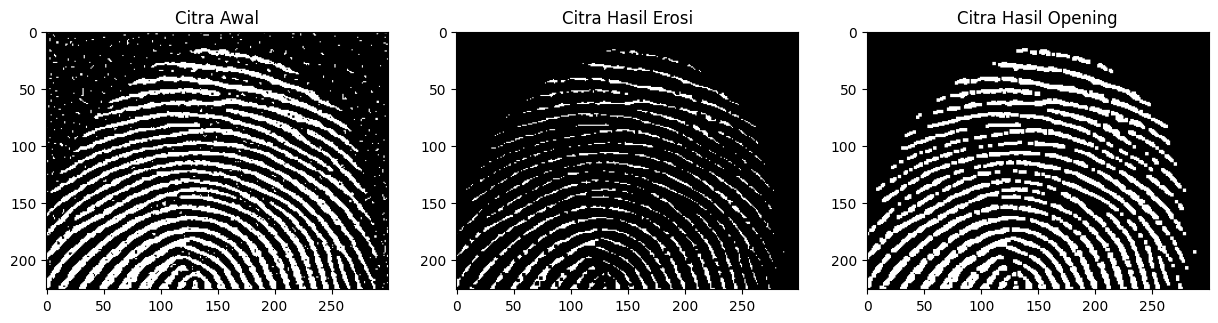

In [29]:
# Operasi dengan menggunakan library

# Load gambar
image = cv2.imread('drive/MyDrive/PCVK/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Thresholding untuk binerisasi
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat Structuring Element berbentuk square 3x3
structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Langkah 1: Erosi
eroded_image = cv2.erode(binary_image, structuring_element)

# Langkah 2: Dilasi
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, structuring_element)

# Tampilkan hasil
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')

plt.subplot(1, 3, 3)
plt.imshow(opened_image, cmap='gray')
plt.title('Citra Hasil Opening')

plt.show()


8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

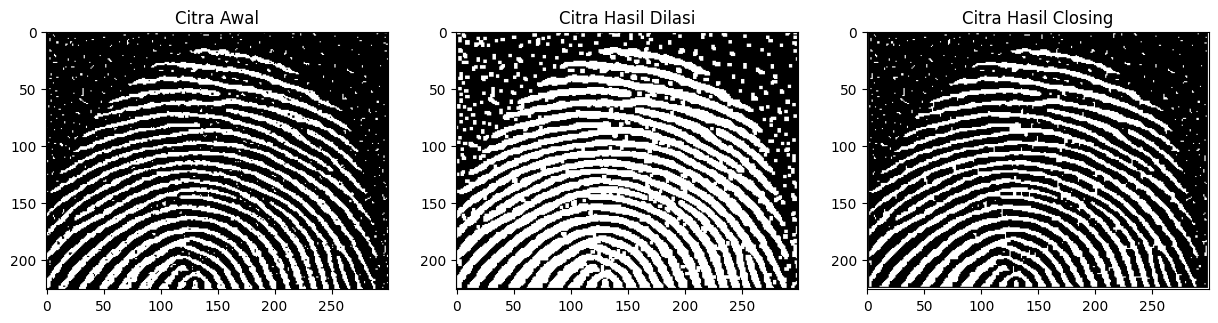

In [30]:
# Operasi tanpa menggunakan library

# Fungsi untuk melakukan dilasi
def dilate(image, struct_elem):
    rows, cols = image.shape
    s_rows, s_cols = struct_elem.shape
    pad_r = s_rows // 2
    pad_c = s_cols // 2
    dilated_image = np.zeros_like(image)

    for i in range(pad_r, rows - pad_r):
        for j in range(pad_c, cols - pad_c):
            region = image[i - pad_r:i + pad_r + 1, j - pad_c:j + pad_c + 1]
            if np.any(region[struct_elem == 1] == 255):
                dilated_image[i, j] = 255

    return dilated_image

# Fungsi untuk melakukan erosi
def erode(image, struct_elem):
    rows, cols = image.shape
    s_rows, s_cols = struct_elem.shape
    pad_r = s_rows // 2
    pad_c = s_cols // 2
    eroded_image = np.ones_like(image) * 255

    for i in range(pad_r, rows - pad_r):
        for j in range(pad_c, cols - pad_c):
            region = image[i - pad_r:i + pad_r + 1, j - pad_c:j + pad_c + 1]
            if np.all(region[struct_elem == 1] == 255):
                eroded_image[i, j] = 255
            else:
                eroded_image[i, j] = 0

    return eroded_image

# Load gambar fingerprint
image = cv2.imread('drive/MyDrive/PCVK/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Thresholding untuk binerisasi
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Structuring Element berbentuk square 3x3
structuring_element = np.ones((3, 3), dtype=np.uint8)

# Langkah 1: Dilasi
dilated_image = dilate(binary_image, structuring_element)

# Langkah 2: Erosi
closed_image = erode(dilated_image, structuring_element)

# Tampilkan hasil
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.subplot(1, 3, 3)
plt.imshow(closed_image, cmap='gray')
plt.title('Citra Hasil Closing')

plt.show()


9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3  dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

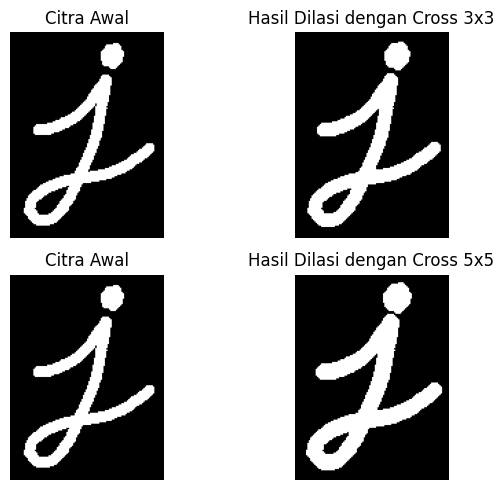

In [40]:
# Load gambar
image = cv2.imread('drive/MyDrive/PCVK/j.png', cv2.IMREAD_GRAYSCALE)

# Thresholding untuk binerisasi
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membuat Structuring Element berbentuk cross 3x3 dan 5x5
se_cross_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
se_cross_5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# Langkah 1: Dilasi menggunakan Structuring Element cross 3x3
dilated_image_3x3 = cv2.dilate(binary_image, se_cross_3x3)

# Langkah 2: Dilasi menggunakan Structuring Element cross 5x5
dilated_image_5x5 = cv2.dilate(binary_image, se_cross_5x5)

# Tampilkan hasil
plt.figure(figsize=(7, 5))

plt.subplot(2, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dilated_image_3x3, cmap='gray')
plt.title('Hasil Dilasi dengan Cross 3x3')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(dilated_image_5x5, cmap='gray')
plt.title('Hasil Dilasi dengan Cross 5x5')
plt.axis('off')

plt.tight_layout()
plt.show()


10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3  dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

Structuring Element Circular 3x3:
[[0 1 0]
 [1 1 1]
 [0 1 0]]

Structuring Element Circular 5x5:
[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


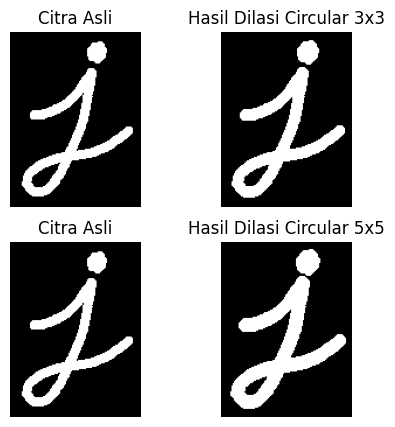

In [47]:
# Fungsi untuk membuat Structuring Element berbentuk circular
def create_circular_structuring_element(size):
    radius = size // 2
    y, x = np.ogrid[-radius:radius+1, -radius:radius+1]
    mask = x**2 + y**2 <= radius**2
    se = np.zeros((size, size), dtype=np.uint8)
    se[mask] = 1
    return se

# Fungsi untuk melakukan dilasi
def dilate(image, struct_elem):
    rows, cols = image.shape
    s_rows, s_cols = struct_elem.shape
    pad_r = s_rows // 2
    pad_c = s_cols // 2
    dilated_image = np.zeros_like(image)

    for i in range(pad_r, rows - pad_r):
        for j in range(pad_c, cols - pad_c):
            region = image[i - pad_r:i + pad_r + 1, j - pad_c:j + pad_c + 1]
            if np.any(region[struct_elem == 1] == 255):
                dilated_image[i, j] = 255

    return dilated_image

# Load gambar
image = cv2.imread('drive/MyDrive/PCVK/j.png', cv2.IMREAD_GRAYSCALE)

# Thresholding untuk binerisasi
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Buat Structuring Element Circular 3x3 dan 5x5
circular_3x3 = create_circular_structuring_element(3)
circular_5x5 = create_circular_structuring_element(5)

# Lakukan dilasi menggunakan kedua structuring element
dilated_image_3x3 = dilate(binary_image, circular_3x3)
dilated_image_5x5 = dilate(binary_image, circular_5x5)

# Tampilkan Structuring Elements
print("Structuring Element Circular 3x3:")
print(circular_3x3)
print("\nStructuring Element Circular 5x5:")
print(circular_5x5)

# Tampilkan hasil
plt.figure(figsize=(5, 5))

plt.subplot(2, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dilated_image_3x3, cmap='gray')
plt.title('Hasil Dilasi Circular 3x3')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(dilated_image_5x5, cmap='gray')
plt.title('Hasil Dilasi Circular 5x5')
plt.axis('off')

plt.show()

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5  dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

Structuring Element Rectangle 3x5:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

Structuring Element Rectangle 5x7:
[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]


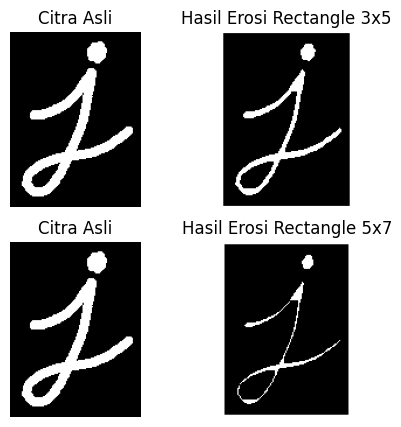

In [49]:
# Fungsi untuk membuat Structuring Element berbentuk rectangle
def create_rectangle_structuring_element(height, width):
    return np.ones((height, width), dtype=np.uint8)

# Fungsi untuk melakukan erosi
def erode(image, struct_elem):
    rows, cols = image.shape
    s_rows, s_cols = struct_elem.shape
    pad_r = s_rows // 2
    pad_c = s_cols // 2
    eroded_image = np.ones_like(image) * 255  # Set default to white

    for i in range(pad_r, rows - pad_r):
        for j in range(pad_c, cols - pad_c):
            region = image[i - pad_r:i + pad_r + 1, j - pad_c:j + pad_c + 1]
            if np.all(region[struct_elem == 1] == 255):
                eroded_image[i, j] = 255
            else:
                eroded_image[i, j] = 0

    return eroded_image

# Load gambar
image = cv2.imread('drive/MyDrive/PCVK/j.png', cv2.IMREAD_GRAYSCALE)

# Thresholding untuk binerisasi (jika perlu)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Buat Structuring Element Rectangle 3x5 dan 5x7
rectangle_3x5 = create_rectangle_structuring_element(3, 5)
rectangle_5x7 = create_rectangle_structuring_element(5, 7)

# Lakukan erosi menggunakan kedua structuring element
eroded_image_3x5 = erode(binary_image, rectangle_3x5)
eroded_image_5x7 = erode(binary_image, rectangle_5x7)

# Tampilkan Structuring Elements
print("Structuring Element Rectangle 3x5:")
print(rectangle_3x5)
print("\nStructuring Element Rectangle 5x7:")
print(rectangle_5x7)

# Tampilkan hasil: Citra asli, hasil erosi 3x5, dan hasil erosi 5x7
plt.figure(figsize=(5, 5))

plt.subplot(2, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(eroded_image_3x5, cmap='gray')
plt.title('Hasil Erosi Rectangle 3x5')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(eroded_image_5x7, cmap='gray')
plt.title('Hasil Erosi Rectangle 5x7')
plt.axis('off')

plt.show()

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

Structuring Element Line Vertical 3x1:
[[1]
 [1]
 [1]]

Structuring Element Line Vertical 5x1:
[[1]
 [1]
 [1]
 [1]
 [1]]


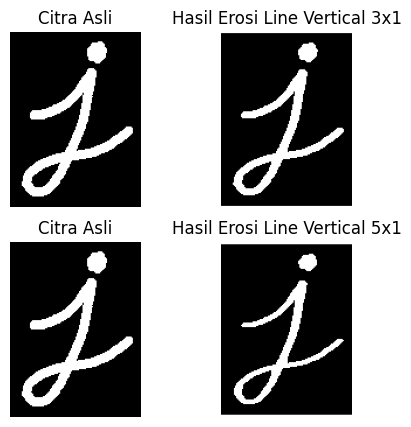

In [51]:
# Fungsi untuk membuat Structuring Element berbentuk line vertical
def create_vertical_line_structuring_element(length):
    return np.ones((length, 1), dtype=np.uint8)

# Fungsi untuk melakukan erosi
def erode(image, struct_elem):
    rows, cols = image.shape
    s_rows, s_cols = struct_elem.shape
    pad_r = s_rows // 2
    pad_c = s_cols // 2
    eroded_image = np.ones_like(image) * 255  # Set default to white

    for i in range(pad_r, rows - pad_r):
        for j in range(pad_c, cols - pad_c):
            region = image[i - pad_r:i + pad_r + 1, j - pad_c:j + pad_c + 1]
            if np.all(region[struct_elem == 1] == 255):
                eroded_image[i, j] = 255
            else:
                eroded_image[i, j] = 0

    return eroded_image

# Load gambar
image = cv2.imread('drive/MyDrive/PCVK/j.png', cv2.IMREAD_GRAYSCALE)

# Thresholding untuk binerisasi (jika perlu)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Buat Structuring Element Line Vertical 3x1 dan 5x1
vertical_line_3x1 = create_vertical_line_structuring_element(3)
vertical_line_5x1 = create_vertical_line_structuring_element(5)

# Lakukan erosi menggunakan kedua structuring element
eroded_image_3x1 = erode(binary_image, vertical_line_3x1)
eroded_image_5x1 = erode(binary_image, vertical_line_5x1)

# Tampilkan Structuring Elements
print("Structuring Element Line Vertical 3x1:")
print(vertical_line_3x1)
print("\nStructuring Element Line Vertical 5x1:")
print(vertical_line_5x1)

# Tampilkan hasil
plt.figure(figsize=(5, 5))

plt.subplot(2, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(eroded_image_3x1, cmap='gray')
plt.title('Hasil Erosi Line Vertical 3x1')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')


plt.subplot(2, 2, 4)
plt.imshow(eroded_image_5x1, cmap='gray')
plt.title('Hasil Erosi Line Vertical 5x1')
plt.axis('off')

plt.show()